In [1]:
import minna_functions as mf

In [135]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sqlite3
conn = sqlite3.connect('spotify.db')
c = conn.cursor()

In [227]:
c.execute('''DROP TABLE rap_hits''')

Connect to Database:

In [223]:
get_playlist = mf.get_spotify_playlist('BQDc8f4TKUjsZ713oQU40LBYYPSFBufL6vD1T5qQkOz45KHPibGqLXoA_rLrNLIVKg-YkSSbD6jzU9kg5dqJMFnd0A6NABj58_8lNzAwD5tppGSvviWS1bSfftzkf6eMKzaRNhuhAf2ADe-pdBA')

Retrieve data for every playlist we want to look at and put it into SQL table:

In [228]:
#pop hits data
get_playlist.get_playlist_SQL('37i9dQZF1DX92MLsP3K1fI', 'pop_hits') 
get_playlist.get_playlist_SQL('5TDtuKDbOhrfW7C58XnriZ', 'pop_hits')
get_playlist.get_playlist_SQL('37i9dQZF1DXcBWIGoYBM5M', 'pop_hits')
get_playlist.get_playlist_SQL('37i9dQZF1DWUa8ZRTfalHk', 'pop_hits')
get_playlist.get_playlist_SQL('6pv75Rri5UysKxaiMySlh5', 'pop_hits') #pop playlist
get_playlist.get_playlist_SQL('6e57PJUvtzv8UQlPoEbEGm', 'pop_hits') #poppin
get_playlist.get_playlist_SQL('10P3hE599XmLaUK7nPSE27', 'pop_hits') #pop party: all albums
get_playlist.get_playlist_SQL('7JaAxxZGUiXIf5rL2acDWm', 'pop_hits') #positive pop
get_playlist.get_playlist_SQL('6Mc2W56Tx1xN1p3g7momll', 'pop_hits') #rock y pop del viejo
get_playlist.get_playlist_SQL('40yeB21DbTjUS2mAlGO2Ax', 'pop_hits') #teen pop late 90s early 00s

In [229]:
#rap data
get_playlist.get_playlist_SQL('37i9dQZF1DX0XUsuxWHRQd', 'rap_hits') #rap caviar
get_playlist.get_playlist_SQL('5KR0bQIR4BqsgBzV2N54wm', 'rap_hits') #top hip hop
get_playlist.get_playlist_SQL('2G2zkK3cBVXB1jSsDMQSk3', 'rap_hits') # top rap hits 2019
get_playlist.get_playlist_SQL('37i9dQZF1DX2RxBh64BHjQ', 'rap_hits') #most necessary
get_playlist.get_playlist_SQL('37i9dQZF1DWUFmyho2wkQU', 'rap_hits') #hip hop drive
get_playlist.get_playlist_SQL('37i9dQZF1DX14EWeH2Pwf3', 'rap_hits') #rap itali: battle royale
get_playlist.get_playlist_SQL('37i9dQZF1DX76t638V6CA8', 'rap_hits') #rap workout
get_playlist.get_playlist_SQL('0zysvwomOYS5M1ceyE1rB7', 'rap_hits') #rap essentials
get_playlist.get_playlist_SQL('4Ao85ZB0F474SYUelDH1Xi', 'rap_hits') #sad rap
get_playlist.get_playlist_SQL('37i9dQZF1DX5jNEiuvPyWr', 'rap_hits') #cloud rap

In [230]:
#country data
get_playlist.get_playlist_SQL('37i9dQZF1DX1lVhptIYRda', 'country_hits') #hot country
get_playlist.get_playlist_SQL('37i9dQZF1DX8S0uQvJ4gaa', 'country_hits') #new boots
get_playlist.get_playlist_SQL('37i9dQZF1DX5mB2C8gBeUM', 'country_hits') #wild country
get_playlist.get_playlist_SQL('37i9dQZF1DWYnwbYQ5HnZU', 'country_hits') #country gold
get_playlist.get_playlist_SQL('37i9dQZF1DX8WMG8VPSOJC', 'country_hits') #country kind of love
get_playlist.get_playlist_SQL('37i9dQZF1DWYiR2Uqcon0X', 'country_hits') #country coffeehouse
get_playlist.get_playlist_SQL('37i9dQZF1DX13ZzXoot6Jc', 'country_hits') #country favorites
get_playlist.get_playlist_SQL('37i9dQZF1DWYubIwLN4Hq2', 'country_hits') #country parts
get_playlist.get_playlist_SQL('4SssSas9VvpPXlMCWXnu91', 'country_hits') #country love songs
get_playlist.get_playlist_SQL('37i9dQZF1DWSttCmn8GHUg', 'country_hits') #country music 101: god bless the USA
get_playlist.get_playlist_SQL('37i9dQZF1DWTkxQvqMy4WW', 'country_hits') #chillin on a dirt road

In [231]:
#jazz data 
get_playlist.get_playlist_SQL('37i9dQZF1DXbITWG1ZJKYt', 'jazz_hits') #jazz classics
get_playlist.get_playlist_SQL('37i9dQZF1DX0SM0LYsmbMT', 'jazz_hits') #jazz vibes
get_playlist.get_playlist_SQL('0pYnghexkCjipMVbXSiyOb', 'jazz_hits') #Top Jazz hits
get_playlist.get_playlist_SQL('37i9dQZF1DWTALrdBtcXjw', 'jazz_hits') #jazzy dinner
get_playlist.get_playlist_SQL('37i9dQZF1DXbOVU4mpMJjh', 'jazz_hits') #jazz relax
get_playlist.get_playlist_SQL('37i9dQZF1DWTsUzn4pp2rW', 'jazz_hits') #jazz pop
get_playlist.get_playlist_SQL('37i9dQZF1DX2mmt7R81K2b', 'jazz_hits') #jazz-- classical crossings
get_playlist.get_playlist_SQL('37i9dQZF1DWVqfgj8NZEp1', 'jazz_hits') #coffee table jazz
get_playlist.get_playlist_SQL('37i9dQZF1DX4wta20PHgwo', 'jazz_hits') #late night jazz
get_playlist.get_playlist_SQL('37i9dQZF1DWTR4ZOXTfd9K', 'jazz_hits') #jazz classic blue
get_playlist.get_playlist_SQL('37i9dQZF1DXdwTUxmGKrdN', 'jazz_hits') #smooth jazz

Convert SQL database to a pandas dataframe:

In [232]:
df_pop = get_playlist.SQL_to_dataframe('pop_hits')
df_rap = get_playlist.SQL_to_dataframe('rap_hits')
df_country = get_playlist.SQL_to_dataframe('country_hits')
df_jazz = get_playlist.SQL_to_dataframe('jazz_hits')

Retrive audio feature information from each song in the playlist: 

In [233]:
df_pop = get_playlist.song_audio_features(df_pop, 'pop_hits')
df_rap = get_playlist.song_audio_features(df_rap, 'rap_hits')
df_country = get_playlist.song_audio_features(df_country, 'country_hits')
df_jazz = get_playlist.song_audio_features(df_jazz, 'jazz_hits')

None
None
None
None
None


Make a new column for our genres:

In [234]:
df_pop['genre'] = 'pop'
df_rap['genre'] = 'rap'
df_country['genre'] = 'country'
df_jazz['genre'] = 'jazz'

combine all data frames and remove null values:

In [235]:
frames = [df_pop, df_rap, df_country, df_jazz]
total_df = pd.concat(frames)
total_df.groupby('genre').mean()
len(total_df)

2583

In [294]:
total_df['speechiness_binned'] = pd.cut(total_df['speechiness'], bins = 10, labels= ['1','2','3','4','5','6','7','8','9', '10'])
total_df['speechiness_binned']=total_df['speechiness_binned'].astype('category')

In [295]:
total_df.dropna(axis=0, inplace = True)
total_df.head()

,song_name,song_id,popularity,artist_name,speechiness,danceability,energy,liveness,valence,genre,speechiness_binned
index,,,,,,,,,,,
1,Sucker,4y3OI86AEP6PQoDE6olYhO,90,Jonas Brothers,0.0588,0.842,0.734,0.1060,0.952,pop,1
2,Never Really Over,5PYQUBXc7NYeI1obMKSJK0,91,Katy Perry,0.0602,0.770,0.882,0.3160,0.385,pop,1
3,Old Town Road - Remix,6u7jPi22kF8CTQ3rb9DHE7,96,Lil Nas X,0.1020,0.878,0.619,0.1130,0.639,pop,2
4,bad guy (with Justin Bieber),3yNZ5r3LKfdmjoS3gkhUCT,80,Billie Eilish,0.2950,0.670,0.453,0.1170,0.680,pop,6
5,I Don't Care (with Justin Bieber),3HVWdVOQ0ZA45FuZGSfvns,98,Ed Sheeran,0.0442,0.798,0.675,0.0894,0.842,pop,1


Analyze the data:

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
%matplotlib inline

check to see distribution of dependent variable (popularity)

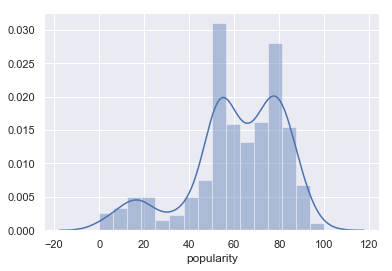

In [297]:
sns.distplot(total_df['popularity'], kde = True)

# (1) Does speechiness have an effect on popularity?

Visualizing the effects of speechiness on popularity:

Text(0.5, 1.0, 'songs speechiness vs. popularity')

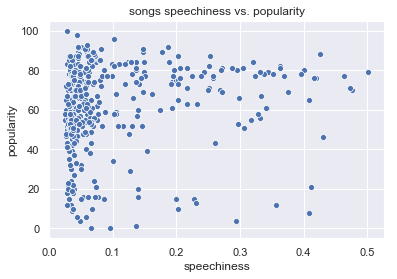

In [298]:
ax = sns.scatterplot(x=total_df["speechiness"], y=total_df["popularity"], data = total_df)
plt.title('songs speechiness vs. popularity')

Text(0.5, 1.0, 'songs genre vs. popularity')

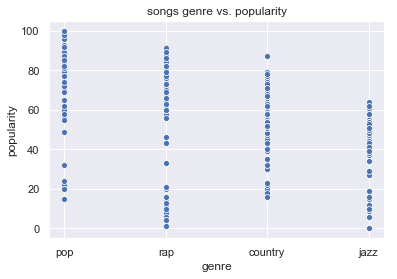

In [299]:
ax = sns.scatterplot(x=total_df["genre"], y=total_df["popularity"], data = total_df)
plt.title('songs genre vs. popularity')

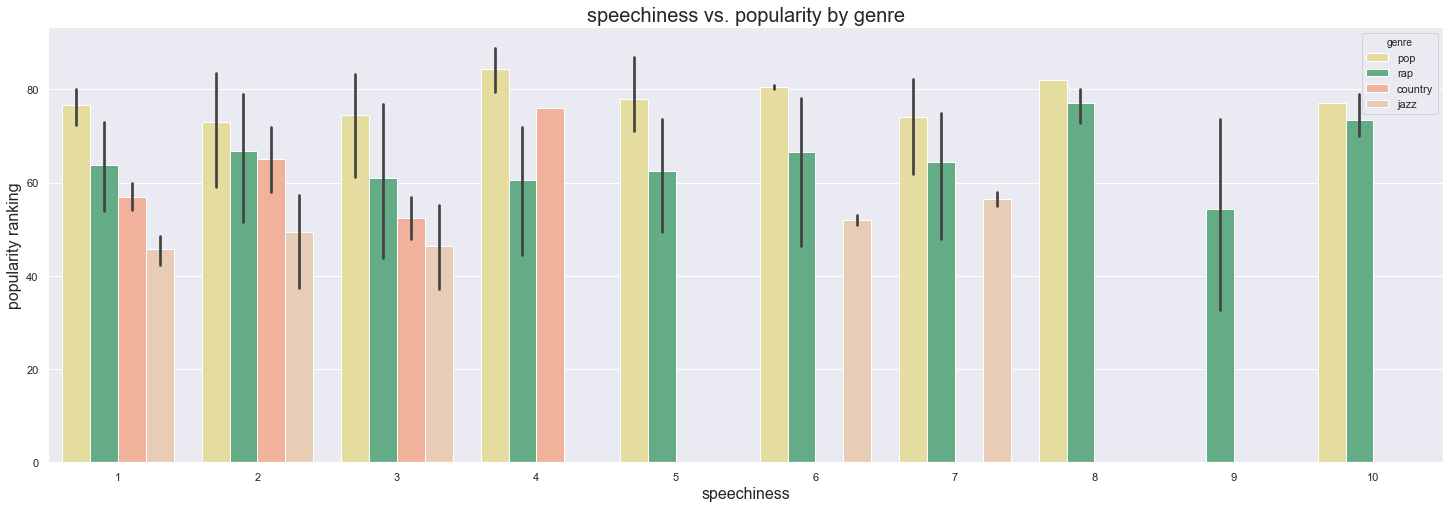

In [300]:
palette = ['#f0e594', '#57b884', '#ffab8d', '#f2cbac', '#ff6a9e']
plt.figure(figsize=(25,8))
ax2 = sns.barplot(x=total_df["speechiness_binned"], y=total_df["popularity"], hue = 'genre', data = total_df, palette = palette)
plt.title('speechiness vs. popularity by genre').set_fontsize(20)
plt.xlabel('speechiness').set_fontsize(16)
plt.ylabel('popularity ranking').set_fontsize(16)

In [301]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

In [302]:
model1 = ols('popularity~ speechiness', total_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     9.049
Date:                Mon, 15 Jul 2019   Prob (F-statistic):            0.00279
Time:                        16:35:05   Log-Likelihood:                -1885.4
No. Observations:                 423   AIC:                             3775.
Df Residuals:                     421   BIC:                             3783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      57.9485      1.427     40.605      0.000      55.143      60.754
speechiness    30.0585      9.992      3.008      0.003      10.417      49.700
==============================================================================
Omnibus:                       50.132   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.698
Skew:                          -0.909   Prob(JB):                     8.93e-15
Kurtosis:                       3.603   Cond. No.                         9.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r^2 value for popularity and speechiness for all genres is 0.021... leading us to conclude that there is no real significance between speechiness and popularity across all genres. 

# (2) How does speechiness affect a song's popularity within a certain genre?

Quick visual to understand our data:

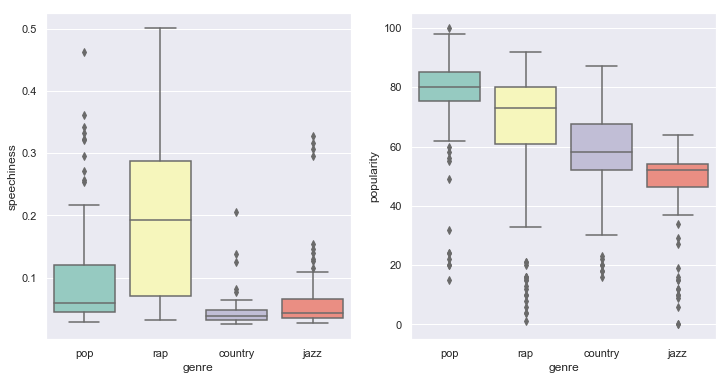

In [303]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot = sns.boxplot(x="genre", y="speechiness", data=total_df, palette='Set3')

plt.subplot(1,2,2)
plt.plot = sns.boxplot(x="genre", y="popularity", data=total_df, palette="Set3")

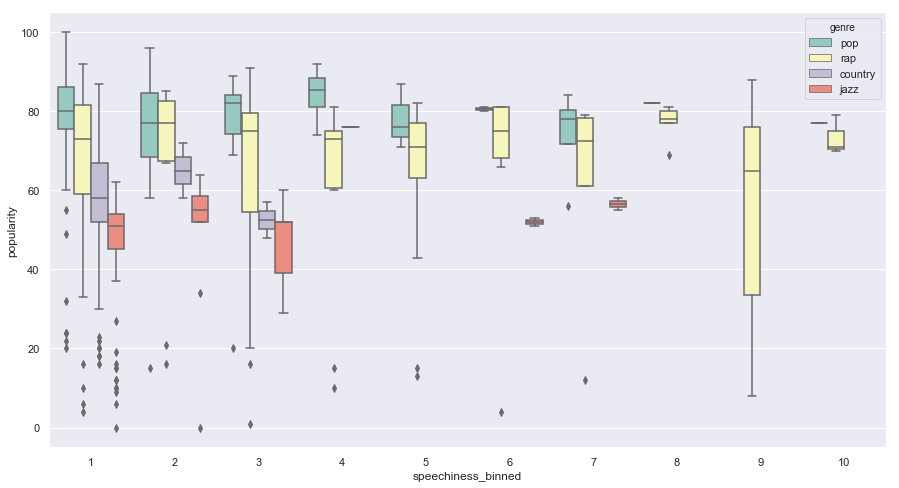

In [304]:
plt.figure(figsize = (15, 8))
ax3 = sns.boxplot(x="speechiness_binned", y="popularity", hue = 'genre', data=total_df, palette='Set3')

Model for understanding the relationship between speechiness, popularity, and genre:

In [305]:
model2 = ols('popularity~ speechiness_binned * C(genre)', total_df).fit()
print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")
model2.summary()

Overall model F( 27, 395) =  5.914, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     5.914
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           6.82e-17
Time:                        16:35:10   Log-Likelihood:                -1818.1
No. Observations:                 423   AIC:                             3692.
Df Residuals:                     395   BIC:                             3806.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    56.9208      1.833     31.056      0.000      53.317      60.524
speechiness_binned[T.2]                       8.0792     13.153      0.614      0.539     -17.780      33.938
speechiness_binned[T.3]                      -4.4208     13.153     -0.336      0.737     -30.280      21.438
speechiness_binned[T.4]                      19.0792     18.511      1.031      0.303     -17.313      55.472
speechiness_binned[T.5]                       0.0481      4.173      0.012      0.991      -8.157       8.253
speechiness_binned[T.6]                       3.2713      5.020      0.652      0.515      -6.598      13.141
speechiness_binned[T.7]                       2.2401      4.461      0.502      0.616      -6.530      11.010
speechiness_binned[T.8]                       6.2533      6.870      0.910      0.363      -7.252      19.759
speechiness_binned[T.9]                      -4.6905      3.906     -1.201      0.231     -12.370       2.989
speechiness_binned[T.10]                      3.3644      7.226      0.466      0.642     -10.842      17.571
C(genre)[T.jazz]                            -11.2464      2.703     -4.161      0.000     -16.560      -5.933
C(genre)[T.pop]                              19.6527      2.889      6.802      0.000      13.972      25.333
C(genre)[T.rap]                               6.7459      3.991      1.690      0.092      -1.100      14.592
speechiness_binned[T.2]:C(genre)[T.jazz]     -4.3900     14.415     -0.305      0.761     -32.730      23.950
speechiness_binned[T.3]:C(genre)[T.jazz]      5.1464     15.646      0.329      0.742     -25.614      35.907
speechiness_binned[T.4]:C(genre)[T.jazz]   2.143e-14   2.94e-14      0.728      0.467   -3.65e-14    7.93e-14
speechiness_binned[T.5]:C(genre)[T.jazz]   9.607e-17   3.11e-15      0.031      0.975   -6.02e-15    6.21e-15
speechiness_binned[T.6]:C(genre)[T.jazz]      3.0542     10.583      0.289      0.773     -17.752      23.860
speechiness_binned[T.7]:C(genre)[T.jazz]      8.5855     10.329      0.831      0.406     -11.722      28.893
speechiness_binned[T.8]:C(genre)[T.jazz]   3.732e-15   5.12e-15      0.729      0.467   -6.33e-15    1.38e-14
speechiness_binned[T.9]:C(genre)[T.jazz]  -7.373e-16    5.4e-15     -0.136      0.892   -1.14e-14    9.89e-15
speechiness_binned[T.10]:C(genre)[T.jazz]   5.26e-16   7.78e-15      0.068      0.946   -1.48e-14    1.58e-14
speechiness_binned[T.2]:C(genre)[T.pop]     -11.6527     14.451     -0.806      0.421     -40.064      16.759
speechiness_binned[T.3]:C(genre)[T.pop]       2.3473     14.558      0.161      0.872     -26.273      30.968
speechiness_binned[T.4]:C(genre)[T.pop]     -11.3194     20.105     -0.563      0.574     -50.845      28.206
spe

create anova table to see interactions and relationships:
notice that the interaction between speechiness_binned and genre is not significant, so we can accept this null hypothesis: that there is no significant interaction between the two variables, but we reject the null for the speechiness hypothesis and genre hypothesis in that the have a significant effect on popularity

In [306]:
anova_table = sm.stats.anova_lm(model2, type= 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
speechiness_binned,9.0,6460.677663,717.853074,2.115708,2.730897e-02
C(genre),3.0,46136.032891,15378.677630,45.325130,3.420837e-25
speechiness_binned:C(genre),27.0,5658.646116,209.579486,0.617688,9.348241e-01
Residual,395.0,134022.288663,339.296933,NaN,NaN


In [307]:
mc = sm.stats.multicomp.MultiComparison(total_df['popularity'], total_df['genre'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff  lower    upper  reject
-----------------------------------------------
country  jazz  -10.7547 -17.1795 -4.3299  True 
country  pop   19.3491  12.9242  25.7739  True 
country  rap    6.5921   0.152   13.0322  True 
  jazz   pop   30.1038  23.6789  36.5286  True 
  jazz   rap   17.3468  10.9067  23.7869  True 
  pop    rap   -12.757  -19.1971 -6.3169  True 
-----------------------------------------------


In [308]:
mc = sm.stats.multicomp.MultiComparison(total_df['popularity'], total_df['speechiness_binned'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      10   15.3741  -18.2279 48.9761 False 
  1      2     4.2955  -7.6638  16.2549 False 
  1      3     3.7103  -9.3032  16.7238 False 
  1      4    10.4019  -5.8213  26.6251 False 
  1      5     6.4366  -10.7132 23.5865 False 
  1      6     7.5408  -12.1288 27.2104 False 
  1      7     7.1241  -11.1482 25.3965 False 
  1      8    18.9574  -8.5742  46.4891 False 
  1      9    -4.5902  -30.1238 20.9434 False 
  10     2    -11.0786 -46.2998 24.1427 False 
  10     3    -11.6638 -47.2568 23.9292 False 
  10     4    -4.9722   -41.86  31.9155 False 
  10     5    -8.9375  -46.2421 28.3671 False 
  10     6    -7.8333  -46.3613 30.6946 False 
  10     7     -8.25   -46.0837 29.5837 False 
  10     8     3.5833  -39.4923 46.6589 False 
  10     9    -19.9643 -61.791  21.8625 False 
  2      3    -0.5852  -17.3421 16.1717 False 
  2      

# (3) How does speechiness affect a song's popularity within a certain country?

import data and create SQL tables based on country:

In [309]:
#compile argentina data 
get_playlist.get_playlist_SQL('37i9dQZEVXbMMy2roB9myp', 'argentina') 
get_playlist.get_playlist_SQL('37i9dQZEVXbJajpaXyaKll', 'argentina') 

#compile australia data
get_playlist.get_playlist_SQL('37i9dQZEVXbJPcfkRz0wJ0', 'australia') 
get_playlist.get_playlist_SQL('37i9dQZEVXbO5MSE9RdfN2', 'australia') 

#philipines
get_playlist.get_playlist_SQL('37i9dQZEVXbNBz9cRCSFkY', 'philippines') 
get_playlist.get_playlist_SQL('37i9dQZEVXbJv2Mvelmc3I', 'philippines') 

#romania
get_playlist.get_playlist_SQL('37i9dQZEVXbNZbJ6TZelCq', 'romania') 
get_playlist.get_playlist_SQL('37i9dQZEVXbNwDVyEEfWV3', 'romania') 

#singapore
get_playlist.get_playlist_SQL('37i9dQZEVXbK4gjvS1FjPY', 'singapore') 
get_playlist.get_playlist_SQL('37i9dQZEVXbJVi45MafAu0', 'singapore') 
    
#south africa 
get_playlist.get_playlist_SQL('37i9dQZEVXbMH2jvi6jvjk', 'south_africa') 
get_playlist.get_playlist_SQL('37i9dQZEVXbNaCk6h5bujZ', 'south_africa') 

#brazil
get_playlist.get_playlist_SQL('37i9dQZEVXbMXbN3EUUhlg', 'brazil') 
get_playlist.get_playlist_SQL('37i9dQZEVXbMOkSwG072hV', 'brazil')     


In [310]:
df_argentina = get_playlist.SQL_to_dataframe('argentina')
df_australia = get_playlist.SQL_to_dataframe('australia')
df_philippines = get_playlist.SQL_to_dataframe('philippines')
df_romania = get_playlist.SQL_to_dataframe('romania')
df_south_africa = get_playlist.SQL_to_dataframe('south_africa')
df_brazil = get_playlist.SQL_to_dataframe('brazil')

In [312]:
df_argentina = get_playlist.song_audio_features(df_argentina, 'argentina')
df_australia = get_playlist.song_audio_features(df_australia, 'australia')
df_philippines = get_playlist.song_audio_features(df_philippines, 'philippines')
df_romania = get_playlist.song_audio_features(df_romania, 'romania')
df_south_africa = get_playlist.song_audio_features(df_south_africa, 'south_africa')
df_brazil = get_pldf_pop = get_playlist.song_audio_features(df_brazil, 'brazil')

None
None
None
None


In [314]:
df_argentina['country'] = 'argentina'
df_australia['country'] = 'australia'
df_philippines['country'] = 'philippines'
df_romania['country'] = 'romania'
df_south_africa['country'] = 'south_africa'
df_brazil['country'] = 'brazil'

In [318]:
frames = [df_argentina, df_australia, df_philippines, df_romania, df_south_africa, df_brazil]
countries_df = pd.concat(frames)
countries_df.groupby('country').mean()

,popularity,speechiness,danceability,energy,liveness,valence
country,,,,,,
argentina,74.590361,0.151276,0.739169,0.643863,0.151265,0.598253
australia,77.212500,0.121758,0.739709,0.614418,0.161392,0.535141
brazil,70.921348,0.132225,0.701652,0.694281,0.309994,0.614553
philippies,70.367816,0.097900,0.637744,0.530267,0.152699,0.448535
romania,73.195122,0.126416,0.744148,0.624111,0.140358,0.517642
south_africa,69.511364,0.125913,0.720828,0.620379,0.162628,0.490670


In [326]:
countries_df['speechiness_binned'] = pd.cut(countries_df['speechiness'], bins = 10, labels= ['1','2','3','4','5','6','7','8','9', '10'])
countries_df['speechiness_binned']=countries_df['speechiness_binned'].astype('category')

countries_df['energy_binned'] = pd.cut(countries_df['energy'], bins = 10, labels= ['1','2','3','4','5','6','7','8','9', '10'])
countries_df['energy_binned']=countries_df['energy_binned'].astype('category')

In [327]:
countries_df.dropna(axis=0, inplace = True)
countries_df.head()

,song_name,song_id,popularity,artist_name,speechiness,danceability,energy,liveness,valence,country,speechiness_binned,energy_binned
index,,,,,,,,,,,,
1,Otro Trago,1Ej96GIBCTvgH7tNX1r3qr,94,Sech,0.3410,0.747,0.700,0.1100,0.620,argentina,5,7
2,Callaita,2TH65lNHgvLxCKXM3apjxI,93,Bad Bunny,0.3090,0.610,0.624,0.2430,0.244,argentina,5,7
3,Soltera - Remix,1c0hsvHLELX6y8qymnpLKL,92,Lunay,0.0432,0.795,0.783,0.4370,0.800,argentina,1,8
4,Señorita,0TK2YIli7K1leLovkQiNik,100,Shawn Mendes,0.0287,0.759,0.540,0.0945,0.750,argentina,1,6
5,Tal Vez,5jW3rF4URMdK7tO2xjS5EI,79,Paulo Londra,0.1510,0.855,0.649,0.0801,0.741,argentina,2,7


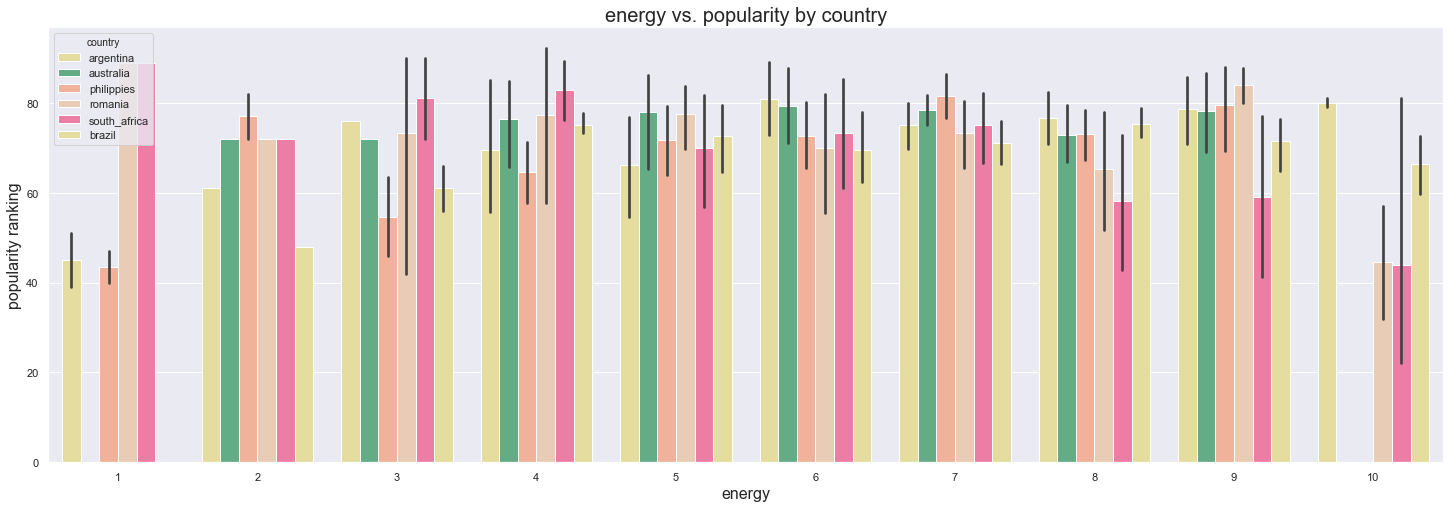

In [328]:
palette = ['#f0e594', '#57b884', '#ffab8d', '#f2cbac', '#ff6a9e']
plt.figure(figsize=(25,8))
ax2 = sns.barplot(x=countries_df["energy_binned"], y=countries_df["popularity"], hue = 'country', data = countries_df, palette = palette)
plt.title('energy vs. popularity by country').set_fontsize(20)
plt.xlabel('energy').set_fontsize(16)
plt.ylabel('popularity ranking').set_fontsize(16)

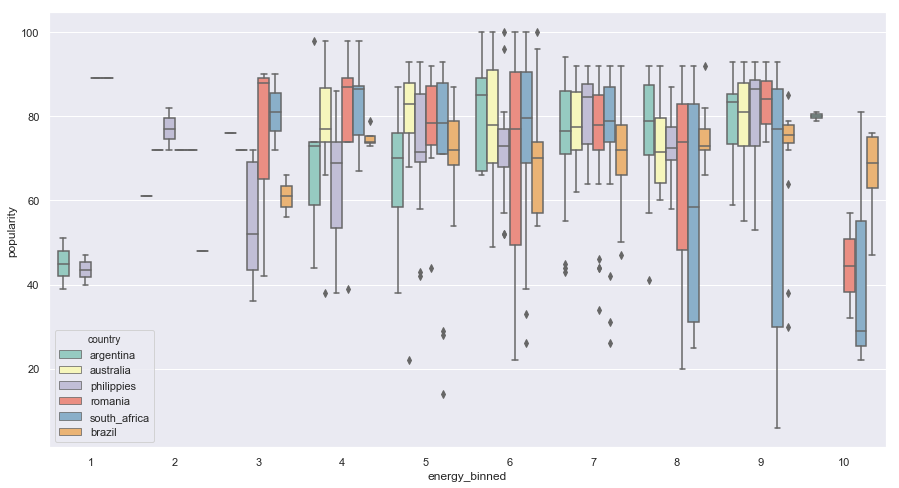

In [329]:
plt.figure(figsize = (15, 8))
ax3 = sns.boxplot(x="energy_binned", y="popularity", hue = 'country', data=countries_df, palette='Set3')

In [333]:
model3 = ols('popularity~ energy_binned * C(country)', countries_df).fit()
print(f"Overall model F({model3.df_model: .0f},{model3.df_resid: .0f}) = {model3.fvalue: .3f}, p = {model3.f_pvalue: .4f}")
model3.summary()

Overall model F( 55, 449) =  1.738, p =  0.0014


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.738
Date:                Mon, 15 Jul 2019   Prob (F-statistic):            0.00141
Time:                        17:04:09   Log-Likelihood:                -2109.9
No. Observations:                 505   AIC:                             4332.
Df Residuals:                     449   BIC:                             4568.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         45.0000     11.837      3.802      0.000      21.736      68.264
energy_binned[T.2]                                16.0000     20.503      0.780      0.436     -24.294      56.294
energy_binned[T.3]                                31.0000     20.503      1.512      0.131      -9.294      71.294
energy_binned[T.4]                                24.6000     14.006      1.756      0.080      -2.926      52.126
energy_binned[T.5]                                21.2857     13.422      1.586      0.113      -5.093      47.664
energy_binned[T.6]                                35.8889     13.087      2.742      0.006      10.170      61.608
energy_binned[T.7]                                30.0357     12.253      2.451      0.015       5.956      54.116
energy_binned[T.8]                                31.6500     12.415      2.549      0.011       7.251      56.049
energy_binned[T.9]                                33.7500     13.235      2.550      0.011       7.741      59.759
energy_binned[T.10]                               35.0000     16.741      2.091      0.037       2.100      67.900
C(country)[T.australia]                            2.5502      4.243      0.601      0.548      -5.788      10.888
C(country)[T.brazil]                              -5.3671      3.898     -1.377      0.169     -13.028       2.294
C(country)[T.philippies]                          -1.5000     16.741     -0.090      0.929     -34.400      31.400
C(country)[T.romania]                             44.0000     20.503      2.146      0.032       3.706      84.294
C(country)[T.south_africa]                        44.0000     20.503      2.146      0.032       3.706      84.294
energy_binned[T.2]:C(country)[T.australia]         8.4498     21.306      0.397      0.692     -33.422      50.321
energy_binned[T.3]:C(country)[T.australia]        -6.5502     21.306     -0.307      0.759     -48.422      35.321
energy_binned[T.4]:C(country)[T.australia]         4.2498      9.132      0.465      0.642     -13.697      22.196
energy_binned[T.5]:C(country)[T.australia]         9.0807      8.204      1.107      0.269      -7.042      25.203
energy_binned[T.6]:C(country)[T.australia]        -4.1664      7.876     -0.529      0.597     -19.645      11.312
energy_binned[T.7]:C(country)[T.australia]         0.8371      5.845      0.143      0.886     -10.650      12.325
energy_binned[T.8]:C(country)[T.australia]        -6.3002      7.120     -0.885      0.377     -20.293       7.692
energy_binned[T.9]:C(country)[T.australia]        -3.0502      8.514     -0.358      0.720     -19.783      13.682
energy_binned[T.10]:C(country)[T.australia]    -1.458e-14   2.18e-14     -0.669      0.504   

In [334]:
anova_table2 = sm.stats.anova_lm(model3, type= 2)
anova_table2

,df,sum_sq,mean_sq,F,PR(>F)
energy_binned,9.0,6072.078907,674.675434,2.407436,0.011286
C(country),5.0,2754.358979,550.871796,1.965669,0.082492
energy_binned:C(country),45.0,18086.642630,401.925392,1.434185,0.038344
Residual,449.0,125830.657899,280.246454,NaN,NaN
